<a href="https://colab.research.google.com/github/Faisal-javed-khan/NLP-PROJECT/blob/main/project_NLP_%5B_Quora_question_pair%5D_duplicate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i am using kaggle api to download direct dataset here no need to download from there

In [ ]:
pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c quora-question-pairs


 93% 287M/309M [00:02<00:00, 128MB/s]
100% 309M/309M [00:02<00:00, 140MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/quora-question-pairs.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [ ]:
import zipfile
with zipfile.ZipFile('/content/train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [ ]:
import pandas as pd
data = pd.read_csv('/content/train.csv')


In [ ]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
df=data[:30000]

In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
12244,12244,23603,23604,What is the average package in IIT?,What is the average packages for IITs?,0
13757,13757,26386,26387,I sent text to my friends on WhatsApp and ther...,"Lately, I sent a WhatsApp message to a friend ...",0
28521,28521,32719,52878,Can you see deleted Instagram posts?,Can you see deleted Instagram comments?,0
1175,1175,2342,2343,Is this the real life or is this some fantasy?,"Queen (band): Is this the real life, or is thi...",1
23253,23253,43581,43582,What are the hot research topics in wireless c...,What are some important research areas in wire...,0
16255,16255,31002,31003,Can I wash my hair everyday?,What happens if you wash your hair everyday?,0
12438,12438,23966,4901,Which is correct: please find the attached fil...,Which one is correct? “please let me know if y...,0
4469,4469,8832,8833,What would you do if you could relive your tee...,If you could relive your teenage years what wo...,1
18420,18420,28220,34901,How can I learn digital marketing?,What should I learn to become a best digital m...,1
3562,3562,7057,7058,Does the female body undergo changes after los...,What might be the reasons why people sometimes...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
print(df["is_duplicate"].value_counts())

0    18843
1    11157
Name: is_duplicate, dtype: int64


In [ ]:
# percentage of duplsicate and non dupl
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)

0    62.81
1    37.19
Name: is_duplicate, dtype: float64


<Axes: >

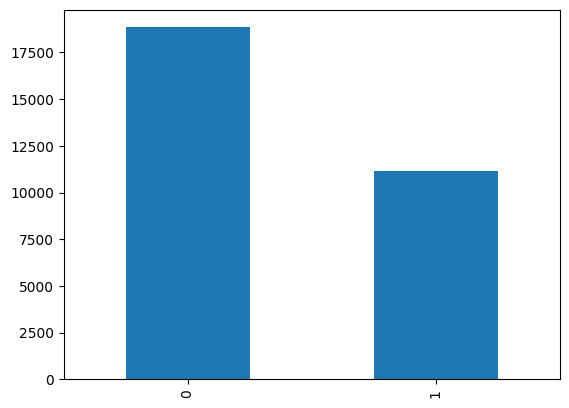

In [ ]:



df["is_duplicate"].value_counts().plot(kind="bar")

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
29995,29995,55448,55449,How do you reset an HP laptop?,How can I reset the password of my HP laptop?,0
29996,29996,55450,55451,How do I break into a password user account on...,I forgot my Windows 10 admin password. How can...,0
29997,29997,55452,55453,Why don't sourashtrians get married at early a...,Find the factors of 3x^2+x?,0
29998,29998,55454,44538,Has there been a book that changed your life?,What are the top-five books that changed your ...,0


how much question repeated and how much  unique

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
qid=pd.Series(df["qid1"].tolist()+data["qid2"].tolist())
qid

0              1
1              3
2              5
3              7
4              9
           ...  
434285    379845
434286    155606
434287    537929
434288    537931
434289    537933
Length: 434290, dtype: int64

In [ ]:
import numpy as np
print("number of unique question in all question", np.unique(qid).shape[0])
x=qid.value_counts()>1
print("number of questions repeated in both questions", x[x].shape[0])

number of unique question in all question 320588
number of questions repeated in both questions 49723


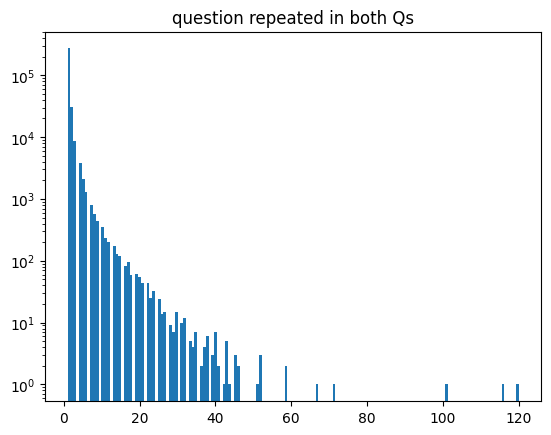

In [ ]:
import matplotlib.pyplot as plt

plt.hist(qid.value_counts().values, bins=160)
plt.yscale("log")
plt.title("question repeated in both Qs")
plt.show()

<h1><b> WE WILL FIND HERE SOME FEATURES

q1 len

q2 len

q1 words

q2 words

words common

words total

words share


In [ ]:
df["q1_len"]=df["question1"].str.len()
df["q2_len"]=df["question2"].str.len()

<ipython-input-86-c7d4fa8c16d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["q1_len"]=df["question1"].str.len()
<ipython-input-86-c7d4fa8c16d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["q2_len"]=df["question2"].str.len()


In [ ]:
df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
25814,25814,48092,48093,Which is the best phone in a range of Rs 5000-...,Which is the super phone around the range of 5...,1,51,55
1618,1618,3222,3223,What makes great movies incredibly engaging?,What are the best movies with a plot twist?,0,44,43
27556,27556,51181,51182,What top 10 crooner songs should I start with ...,What are the top 10 songs of Justin Bieber?,0,87,43


In [ ]:
df["q1_numwords"]=df["question1"].apply( lambda row: len(row.split(" ")))
df["q2_numwords"]=df["question2"].apply( lambda row: len(row.split(" ")))

<ipython-input-88-9a851e34c038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["q1_numwords"]=df["question1"].apply( lambda row: len(row.split(" ")))
<ipython-input-88-9a851e34c038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["q2_numwords"]=df["question2"].apply( lambda row: len(row.split(" ")))


In [ ]:
df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_numwords,q2_numwords
26619,26619,49513,49514,What is a good website for job seeking in the ...,"What are some ""insider"" websites people use fo...",1,55,90,12,15
22914,22914,42966,42967,How can I activate the cash option in the Uber...,How does Uber earn profit on trips paid with c...,0,51,50,11,10
26200,26200,17201,48793,What are the best lines to start anchoring in ...,What are the best lines in Hindi to start anch...,0,55,52,11,10


In [ ]:
def common_words(row):
  w1=set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
  w2=set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
  return len(w1 & w2)

In [ ]:
df["common_words"]=df.apply(common_words , axis=1)

<ipython-input-91-1f3a203db073>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["common_words"]=df.apply(common_words , axis=1)


In [ ]:
df.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_numwords,q2_numwords,common_words
25115,25115,46833,46834,Who invented the light bulb?,Who invented the light bulb? How did he invent...,1,28,52,5,10,5
23572,23572,44145,44146,How much do Wrestlemania tickets cost?,How much do WWE ringside tickets cost on average?,0,38,49,6,9,4


In [ ]:
def total_words(row):
  w1=set(map(lambda word: word.lower().strip() , row["question1"].split(" ")))
  w2=set(map(lambda word: word.lower().strip() , row["question2"].split(" ")))
  return(len(w1) + len(w2))


In [ ]:
df["total_words"]=df.apply(total_words , axis=1)

<ipython-input-94-36f708a49566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_words"]=df.apply(total_words , axis=1)


In [ ]:
df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_numwords,q2_numwords,common_words,total_words
5777,5777,1258,11348,How do I develop my presence of mind?,How do I improve presence of mind?,1,37,34,8,7,6,15
25882,25882,48219,48220,What can be a positive thing about conformity?,How can you turn conformity into a positive th...,0,46,50,8,9,3,17
12715,12715,24476,24477,Where can I get very affordable printing servi...,Where can I get professional paper bag printin...,0,72,70,12,11,7,23


In [ ]:
df["words_share"]=round(df["common_words"]/df["total_words"], 2)

<ipython-input-96-716f8fc27580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["words_share"]=round(df["common_words"]/df["total_words"], 2)


In [ ]:
df.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_numwords,q2_numwords,common_words,total_words,words_share
24822,24822,46325,46326,Why I'm not able to talk to girls?,Why I am not able to talk to girls?,1,34,35,8,9,6,15,0.40
2005,2005,3989,3990,Why do people go for mba after masters in engi...,Why do people do MBA after engineering?,1,53,39,10,7,5,16,0.31


<h1>data analysis

minimum characters 1
maximum characters 370
average num of characters 59


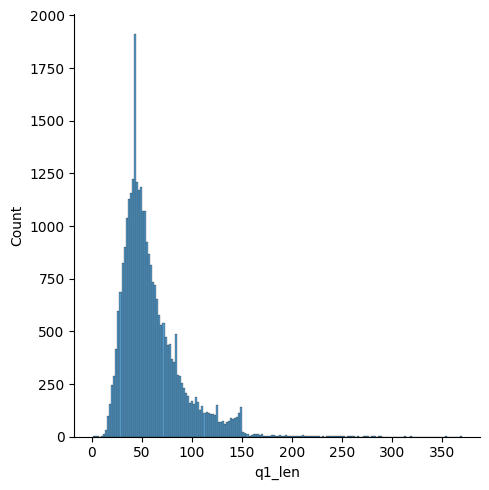

In [ ]:
# Analysis of features
import seaborn as sns
sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average num of characters',int(df['q1_len'].mean()))

minimum characters 6
maximum characters 1169
average num of characters 60


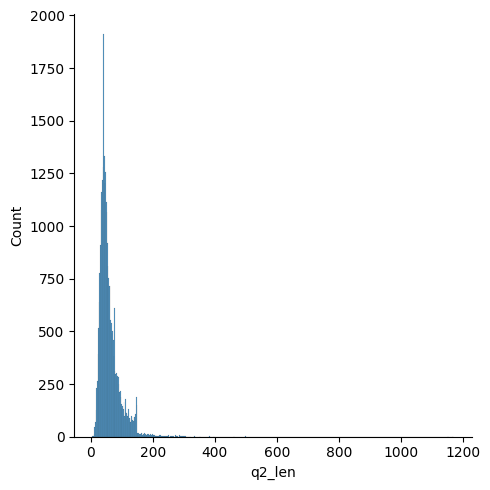

In [ ]:
# Analysis of features
import seaborn as sns
sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average num of characters',int(df['q2_len'].mean()))

minimum words 1
maximum words 71
average num of words 10


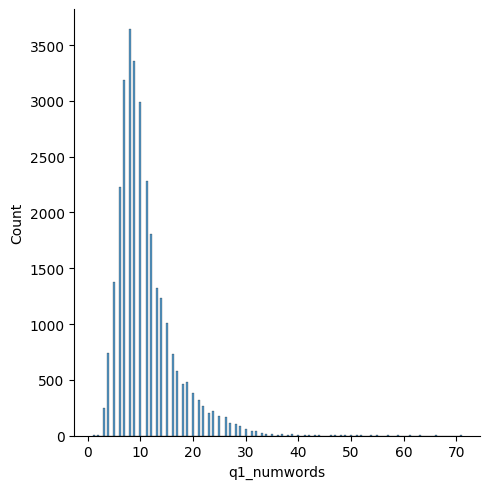

In [ ]:
sns.displot(df['q1_numwords'])
print('minimum words',df['q1_numwords'].min())
print('maximum words',df['q1_numwords'].max())
print('average num of words',int(df['q1_numwords'].mean()))

minimum words 1
maximum words 237
average num of words 11


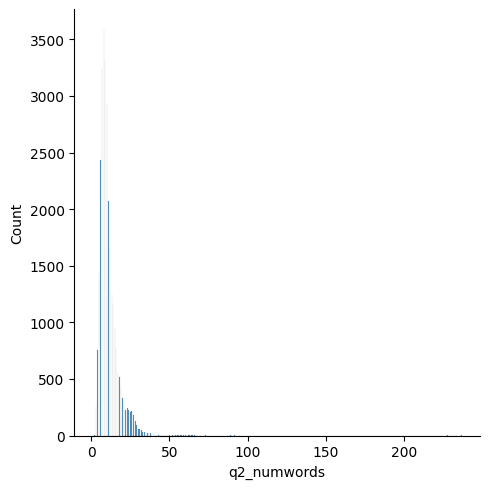

In [ ]:
sns.displot(df['q2_numwords'])
print('minimum words',df['q2_numwords'].min())
print('maximum words',df['q2_numwords'].max())
print('average num of words',int(df['q2_numwords'].mean()))

<ipython-input-102-9fbba4a7cb89>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['common_words'],label='non duplicate')
<ipython-input-102-9fbba4a7cb89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1]['common_words'],label='duplicate')


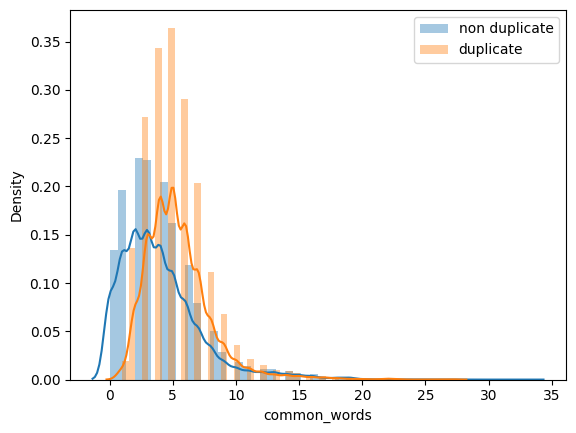

In [ ]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

<h1><b>Feature Engineering

In [ ]:
final_df=df.drop(columns=['id','qid1','qid2','question1','question2'])

In [ ]:
final_df

,is_duplicate,q1_len,q2_len,q1_numwords,q2_numwords,common_words,total_words,words_share
0,0,66,57,14,12,10,23,0.43
1,0,51,88,8,13,4,20,0.20
2,0,73,59,14,10,4,24,0.17
3,0,50,65,11,9,0,19,0.00
4,0,76,39,13,7,2,20,0.10
...,...,...,...,...,...,...,...,...
29995,0,30,45,7,10,4,17,0.24
29996,0,58,60,12,12,3,23,0.13
29997,0,69,27,11,5,0,16,0.00
29998,0,45,59,9,11,3,20,0.15


In [ ]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


<H1><B>BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge qs1 and qst 2
questions=list(df["question1"])+ list(df["question2"])
cv=CountVectorizer(max_features=3000)

In [ ]:
# now we will apply BOW on  questions and then we will split it in two q1 and q2
q1_arr, q2_arr=np.vsplit(cv.fit_transform(questions).toarray(), 2) #split it into vertically

In [ ]:
q1_arr.shape

(30000, 3000)

from both array make an dataframe

In [ ]:
df1 = pd.DataFrame(q1_arr, index= ques_df.index)
df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([df1, df2], axis=1)
temp_df.shape

(30000, 6000)

now concat wirth the finaldf

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_numwords,q2_numwords,common_words,total_words,words_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,66,57,14,12,10,23,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,4,20,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,73,59,14,10,4,24,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,0,19,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,76,39,13,7,2,20,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=final_df.iloc[:,1:].values
x

array([[ 66.,  57.,  14., ...,   0.,   0.,   0.],
       [ 51.,  88.,   8., ...,   0.,   0.,   0.],
       [ 73.,  59.,  14., ...,   0.,   0.,   0.],
       ...,
       [ 69.,  27.,  11., ...,   0.,   0.,   0.],
       [ 45.,  59.,   9., ...,   0.,   0.,   0.],
       [ 27., 192.,   4., ...,   0.,   0.,   0.]])

In [ ]:
y=final_df.iloc[:,0].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7648333333333334

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)

KeyboardInterrupt: ignored